# Statistische Analyse - Vanillekipferl 
`Yannik`, `Krakowski`, `11126298 `
## Hintergrund und Fragestellung
### Fragestellung: 
Ist in den Monaten November und Dezember das Suchinteresse (in Prozent) nach Vanillekipferl in Deutschland (2015) im Vergleich zu den restlichen Monaten anders bzw. größer?
### Nullhypothese: 
Die zwei Stichproben haben identische Erwartungswerte. ($H_0: \mu_{Dez\&Nov} = \mu_{rest}$)
## Beschreibung des Datensets
| Eigenschaft       | Beschreibung          |
| ------------- |:-------------:|
| Hintergund    | Google Suchinteresse des Suchbegriffes "Vanillekipferl" 2015 in Deutschland|
| Quelle     | [Data Set](https://trends.google.de/trends/explore?date=2015-01-01%202015-12-31&geo=DE&q=%2Fm%2F0988ty)    |
| Größe |   769 Bytes   |
| Hintergund Hoster |   Google Trends ist ein Online-Dienst des Unternehmens Google, der Informationen darüber bereitstellt, welche Suchbegriffe von Nutzern der Suchmaschine Google wie oft eingegeben wurden.    |

## Visualisierungen und Analyse
### Grafik 1

Visualisierung der "Raw"-Daten der Suchinteressen in % nach dem Thema "Vanillekipferl" bei Google. Auf der X-Achse, welche sind die einzelnen Tage grob in Monatsabschnitte unterteilt. Die Y-Achse beschreibt das Suchinteresse in Prozent, wobei die Werte das Suchinteresse relativ zum höchsten Punkt im Diagramm im festgelegten Zeitraum von Januar 2015 - Dezember 2015 angeben. Der Wert 100 steht für die höchste Beliebtheit dieses Suchbegriffs. Der Wert 50 bedeutet, dass der Begriff halb so beliebt ist und der Wert 0 bedeutet, dass für diesen Begriff nicht genügend Daten vorlagen.

Text(0, 0.5, 'Suchinteresse in %')

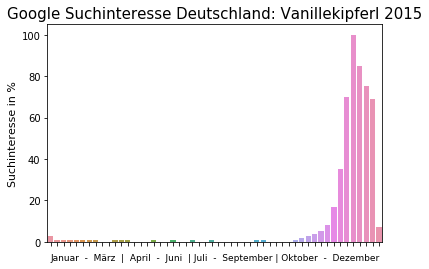

In [1]:
import pandas as pd
import seaborn as sns
from datetime import date
import calendar
data = pd.read_csv('/Users/Student/multiTimeline_2015_deutschland.csv',skiprows=3,names = ['Date','Search interest'])
data['Search interest'] = data['Search interest'].apply(lambda x: int(x) if x.isdigit() else 0)
bymonth = {}
for dateStr, value in list(zip(data['Date'], data['Search interest'])):
    month = date.fromisoformat(dateStr).month
    if month not in bymonth:
        bymonth[month] = []
    bymonth[month].append(value)
bymonthavg = [(calendar.month_name[key], sum(bymonth[key])/len(bymonth[key])) for key in bymonth]
ax1 = sns.barplot(x="Date", y="Search interest", data=data)
ax1.set_xticklabels(ax1.get_xticklabels(5), rotation=0)
ax1.axes.set_title("Google Suchinteresse Deutschland: Vanillekipferl 2015",fontsize=15)
ax1.set_xlabel("Januar  -  März  |  April  -  Juni  | Juli  -  September | Oktober  -  Dezember",fontsize=9)
ax1.set_ylabel("Suchinteresse in %",fontsize=11)

### Grafik 2

Diese Grafik unterteilt das Jahr 2015 in seine Monate. Aus den jeweiligen Daten der zugehörigen Monate wird der Mittelwert visualisiert.

Text(0, 0.5, 'Suchinteresse in %')

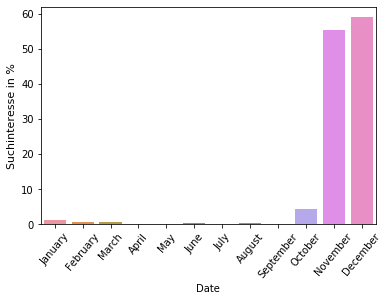

In [2]:
df = pd.DataFrame(bymonthavg, columns=['Date', 'Search interest'])
ax3 = sns.barplot(x="Date", y="Search interest", data=df)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=50)
ax3.set_ylabel("Suchinteresse in %",fontsize=11)

## t-Test

Durchführung des t-Test mit den gegebenen Daten für die jeweiligen Zeiträume Januar bis Oktober und November bis Dezember.
Der t-Wert und p-Wert sind durch

\begin{align*}
t_{teststatistik}&=-11.610265450617874\\
p&= 8.366555999265518 \cdot 10^{-16}
\end{align*}

gegeben.

In [3]:
from scipy.stats import ttest_ind
firstmonths = []
lastmonths = []
for month in bymonth:
    if month <= 10:
        firstmonths += bymonth[month]
    else:
        lastmonths += bymonth[month]
ttest_sp = ttest_ind(firstmonths, lastmonths)
ttest_sp

Ttest_indResult(statistic=-11.610265450617874, pvalue=8.366555999265518e-16)

# Interpretation der Ergebnisse

Da

\begin{equation*}
p= 8.366555999265518 \cdot 10^{-16}< 10^{-15},
\end{equation*}

wird die Nullhypothese bis zu einem Signifikanzniveau von mindestens

\begin{equation*}
\alpha > 10^{-15}
\end{equation*}

verworfen und somit sind die Mittelwerte der zwei Stichproben aus den Monaten November und Dezember und der restlichen Monate signifikant verschieden. Das bedeutet, dass in den Monaten November und Dezember entweder mehr oder weniger Suchinteresse als in den restlichen Monaten des Jahres vorliegt. Ausgehend von unseren Visualisierungen können wir zusätzlich darauf schließen, dass es in den Monaten November und Dezember ein größeres Suchinteresse als im restlichen Jahr gibt und somit unsere Fragestellung bestätigt werden kann.